# Exoplanet Habitability EDA
### Kaydon Skinner

##### At the time of creation of this EDA, there are currently 5,989 exoplanets indexed by the NASA Exoplanet Archive. The study of exoplanets is one that is truly fascinating; being able to analyze worlds beyond our solar system. Moreover, with the study of these planets, their potential habitability is also a field of interest. In this EDA, we will look at all the exoplanets that fit a broad definition of habitability, before further narrowing down and expanding on their characteristics.

### DATA PREPROCESSING 

In [19]:
# libraries
import pandas as pd

In [24]:
# data
data = pd.read_csv("planets.csv")

# there are repeated planet names due to different measurements, bloating the dataset
planets_df = data[data["default_flag"] == 1]
planets_df.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
5,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
7,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2023-09-19,2023-08,2023-09-19
10,14 Her b,14 Her,1,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2023-06-12,2022-09,2023-06-12
21,16 Cyg B b,16 Cyg B,1,3,1,Radial Velocity,1996,Multiple Observatories,Published Confirmed,0,...,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603,2018-09-04,2017-03,2018-09-06


#### For the purposes of this analysis, a habitable planet is defined as ny planet that can: natively host liquid water on its surface, and contain energy and nutrients. 

### Important features to be considered:
* pl_name
    * planet name - identify the planet that is habitable
* pl_rade 
    * radius of the planet - affects gravity, climate, and internal structure
* pl_insol
    * insolation flux - how intense is the solar radiation?
* st_teff
    * stellar effective temperature - star temp. Will affect planet overall temperature
* st_met
    * stellar metallicity - metal in the star. Metal in the star increases likelihood of rocky planets 



In [31]:
habitable_features = ["pl_name", "pl_rade", "pl_insol", "st_teff", "st_met", "pl_eqt", "pl_orbeccen"]
habitable_planets_df = planets_df[habitable_features]
habitable_planets_df.head()

print(f"Missing values:\n {habitable_planets_df.isnull().sum()}\n")
print(f"Total: {habitable_planets_df.isnull().sum().values.sum()} \n")



Missing values:
 pl_name           0
pl_rade        1511
pl_insol       5142
st_teff         681
st_met         1768
pl_eqt         4410
pl_orbeccen    3464
dtype: int64

Total: 16976 



<Axes: >

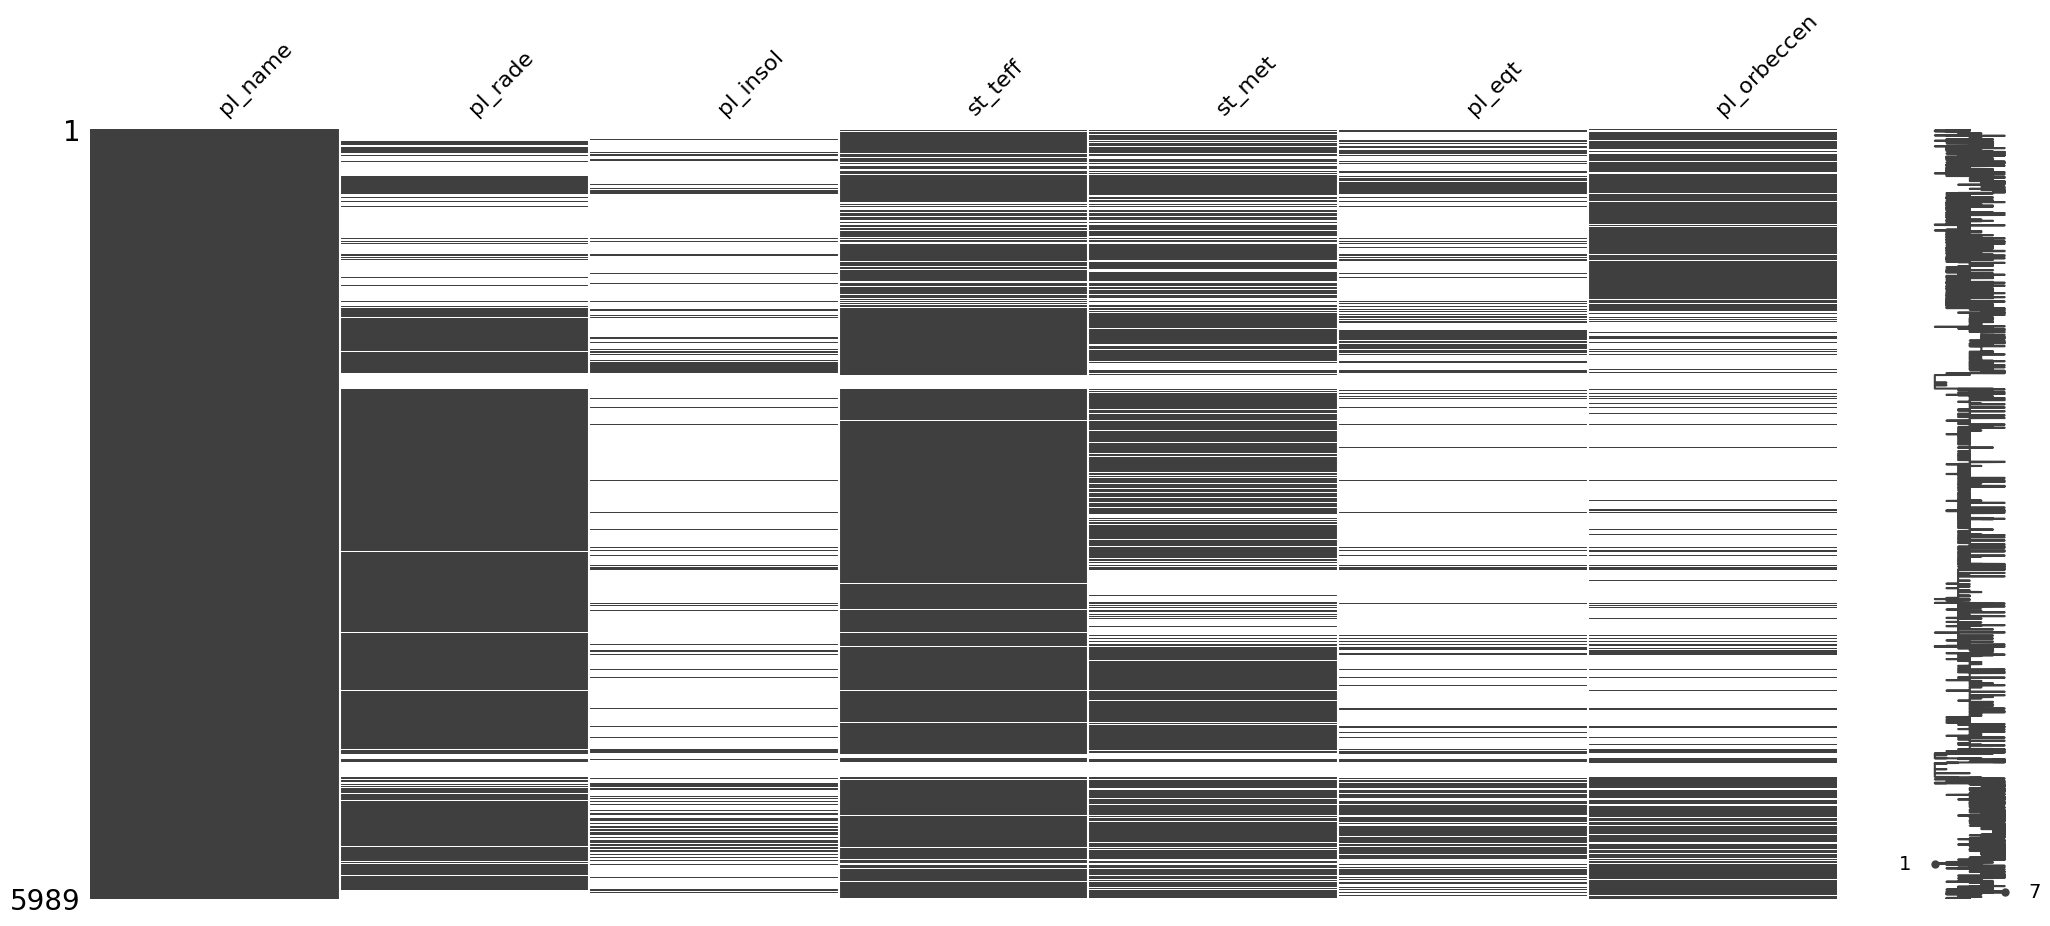

In [32]:
import missingno as msno

msno.matrix(habitable_planets_df)